<a href="https://colab.research.google.com/github/SnS1121/HF_CUNY-Data-Analytics-Program/blob/main/Project3Py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# imported libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [ ]:
#imported file 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/NYPD.csv')

In [ ]:
#looking through data
df.head(5)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,238013474,12/18/2021,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,Q,105,97,18-24,M,BLACK,1057636,203954,40.726187,-73.735234,POINT (-73.73523390399998 40.72618713000002)
1,236943583,11/25/2021,263.0,"ARSON 2,3,4",114.0,ARSON,PL 1501500,F,K,69,71,25-44,M,BLACK,1014340,171320,40.636868,-73.891586,POINT (-73.89158591899997 40.63686750900007)
2,234938876,10/14/2021,594.0,OBSCENITY 1,116.0,SEX CRIMES,PL 2631100,F,K,61,0,25-44,M,WHITE,995244,155739,40.594145,-73.960415,POINT (-73.96041495199995 40.59414516900005)
3,234788259,10/11/2021,263.0,"ARSON 2,3,4",114.0,ARSON,PL 1501001,F,B,42,71,18-24,M,BLACK,1009058,239616,40.824340,-73.910365,POINT (-73.91036538099996 40.82433953100008)
4,234188790,9/28/2021,578.0,NaN,NaN,NaN,PL 2223001,M,B,44,0,25-44,M,BLACK,1005169,246667,40.843703,-73.924395,POINT (-73.92439508899997 40.84370255600004)


In [ ]:
df.describe()

,ARREST_KEY,PD_CD,KY_CD,ARREST_PRECINCT,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
count,1.555070e+05,155478.000000,155404.000000,155507.000000,155507.000000,1.555070e+05,155507.000000,155507.000000,155507.000000
mean,2.304676e+08,407.828066,244.962974,62.850322,0.912486,1.004996e+06,208163.457555,40.737994,-73.925113
std,4.628028e+06,275.739138,150.334545,35.258605,7.894204,2.152869e+04,29904.384015,0.082086,0.077640
min,2.224711e+08,0.000000,101.000000,1.000000,0.000000,9.142140e+05,121312.000000,40.499401,-74.251844
25%,2.263289e+08,113.000000,111.000000,34.000000,0.000000,9.912230e+05,185908.000000,40.676902,-73.974837
50%,2.306202e+08,339.000000,235.000000,62.000000,0.000000,1.004222e+06,207067.000000,40.735036,-73.927979
75%,2.344524e+08,705.000000,344.000000,101.000000,0.000000,1.017119e+06,235804.000000,40.813903,-73.881512
max,2.385139e+08,997.000000,995.000000,123.000000,97.000000,1.066928e+06,271820.000000,40.912723,-73.701612


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155507 entries, 0 to 155506
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ARREST_KEY                155507 non-null  int64  
 1   ARREST_DATE               155507 non-null  object 
 2   PD_CD                     155478 non-null  float64
 3   PD_DESC                   155404 non-null  object 
 4   KY_CD                     155404 non-null  float64
 5   OFNS_DESC                 155404 non-null  object 
 6   LAW_CODE                  155507 non-null  object 
 7   LAW_CAT_CD                154114 non-null  object 
 8   ARREST_BORO               155507 non-null  object 
 9   ARREST_PRECINCT           155507 non-null  int64  
 10  JURISDICTION_CODE         155507 non-null  int64  
 11  AGE_GROUP                 155507 non-null  object 
 12  PERP_SEX                  155507 non-null  object 
 13  PERP_RACE                 155507 non-null  o

In [ ]:
 #removing columns not needed for analysis
 df=df.drop(df.columns[[2,4,6,7,10,14,15,16,17,18]],axis=1)

In [ ]:
#checking if correct columns were removed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155507 entries, 0 to 155506
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ARREST_KEY       155507 non-null  int64 
 1   ARREST_DATE      155507 non-null  object
 2   PD_DESC          155404 non-null  object
 3   OFNS_DESC        155404 non-null  object
 4   ARREST_BORO      155507 non-null  object
 5   ARREST_PRECINCT  155507 non-null  int64 
 6   AGE_GROUP        155507 non-null  object
 7   PERP_SEX         155507 non-null  object
 8   PERP_RACE        155507 non-null  object
dtypes: int64(2), object(7)
memory usage: 10.7+ MB


In [ ]:
df.head(5)

,ARREST_KEY,ARREST_DATE,PD_DESC,OFNS_DESC,ARREST_BORO,ARREST_PRECINCT,AGE_GROUP,PERP_SEX,PERP_RACE
0,238013474,12/18/2021,RAPE 1,RAPE,Q,105,18-24,M,BLACK
1,236943583,11/25/2021,"ARSON 2,3,4",ARSON,K,69,25-44,M,BLACK
2,234938876,10/14/2021,OBSCENITY 1,SEX CRIMES,K,61,25-44,M,WHITE
3,234788259,10/11/2021,"ARSON 2,3,4",ARSON,B,42,18-24,M,BLACK
4,234188790,9/28/2021,NaN,NaN,B,44,25-44,M,BLACK


In [ ]:
#checking null values
df.isnull()

,ARREST_KEY,ARREST_DATE,PD_DESC,OFNS_DESC,ARREST_BORO,ARREST_PRECINCT,AGE_GROUP,PERP_SEX,PERP_RACE
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
155502,False,False,False,False,False,False,False,False,False
155503,False,False,False,False,False,False,False,False,False
155504,False,False,False,False,False,False,False,False,False
155505,False,False,False,False,False,False,False,False,False


In [ ]:
#dropped rows with null values; True= null values
df.dropna(inplace=True)
df

,ARREST_KEY,ARREST_DATE,PD_DESC,OFNS_DESC,ARREST_BORO,ARREST_PRECINCT,AGE_GROUP,PERP_SEX,PERP_RACE
0,238013474,12/18/2021,RAPE 1,RAPE,Q,105,18-24,M,BLACK
1,236943583,11/25/2021,"ARSON 2,3,4",ARSON,K,69,25-44,M,BLACK
2,234938876,10/14/2021,OBSCENITY 1,SEX CRIMES,K,61,25-44,M,WHITE
3,234788259,10/11/2021,"ARSON 2,3,4",ARSON,B,42,18-24,M,BLACK
5,234117071,9/27/2021,RAPE 1,RAPE,K,84,25-44,M,BLACK
...,...,...,...,...,...,...,...,...,...
155502,222884924,1/10/2021,"ROBBERY,OPEN AREA UNCLASSIFIED",ROBBERY,B,46,45-64,M,BLACK
155503,223918625,2/3/2021,WEAPONS POSSESSION 1 & 2,DANGEROUS WEAPONS,K,67,18-24,M,BLACK
155504,224323770,2/13/2021,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,S,121,45-64,M,BLACK
155505,222599533,1/4/2021,WEAPONS POSSESSION 1 & 2,DANGEROUS WEAPONS,K,73,25-44,M,BLACK


In [ ]:
df.head(5)

,ARREST_KEY,ARREST_DATE,PD_DESC,OFNS_DESC,ARREST_BORO,ARREST_PRECINCT,AGE_GROUP,PERP_SEX,PERP_RACE
0,238013474,12/18/2021,RAPE 1,RAPE,Q,105,18-24,M,BLACK
1,236943583,11/25/2021,"ARSON 2,3,4",ARSON,K,69,25-44,M,BLACK
2,234938876,10/14/2021,OBSCENITY 1,SEX CRIMES,K,61,25-44,M,WHITE
3,234788259,10/11/2021,"ARSON 2,3,4",ARSON,B,42,18-24,M,BLACK
5,234117071,9/27/2021,RAPE 1,RAPE,K,84,25-44,M,BLACK


In [ ]:
#wanted to see all the unique values under OFNS_DESC column
print(df['OFNS_DESC'].unique())

['RAPE' 'ARSON' 'SEX CRIMES' 'ASSAULT 3 & RELATED OFFENSES'
 'FELONY ASSAULT' 'DANGEROUS WEAPONS' 'MISCELLANEOUS PENAL LAW'
 'PETIT LARCENY' 'GRAND LARCENY OF MOTOR VEHICLE' 'DANGEROUS DRUGS'
 'NYS LAWS-UNCLASSIFIED FELONY' 'GRAND LARCENY'
 'OTHER OFFENSES RELATED TO THEF' 'PROSTITUTION & RELATED OFFENSES'
 'OFFENSES AGAINST PUBLIC ADMINI' 'ROBBERY' 'FOR OTHER AUTHORITIES'
 'CRIMINAL MISCHIEF & RELATED OF' 'OTHER TRAFFIC INFRACTION' 'FORGERY'
 'INTOXICATED & IMPAIRED DRIVING' 'MURDER & NON-NEGL. MANSLAUGHTE'
 'UNAUTHORIZED USE OF A VEHICLE' 'BURGLARY' 'OFFENSES INVOLVING FRAUD'
 'VEHICLE AND TRAFFIC LAWS' 'OFF. AGNST PUB ORD SENSBLTY &'
 'THEFT OF SERVICES' 'CRIMINAL TRESPASS' 'POSSESSION OF STOLEN PROPERTY'
 'OTHER STATE LAWS (NON PENAL LA' 'FRAUDULENT ACCOSTING'
 'OFFENSES AGAINST THE PERSON' 'FRAUDS' 'OTHER STATE LAWS' 'THEFT-FRAUD'
 'INTOXICATED/IMPAIRED DRIVING' 'GAMBLING' 'HOMICIDE-NEGLIGENT-VEHICLE'
 'ADMINISTRATIVE CODE' "BURGLAR'S TOOLS" 'ALCOHOLIC BEVERAGE CONTROL LAW'
 'ENDA

In [ ]:
#checking to see if i'll have enough data to work with
# number is too small
df['OFNS_DESC'].value_counts()['ARSON']

122

In [ ]:
#checking to see if i'll have enough data to work with part2
# this number works
df['OFNS_DESC'].value_counts()['DANGEROUS DRUGS']

10450

In [ ]:
# checking the values under 'PERP_RACE'
print(df['PERP_RACE'].unique())

['BLACK' 'WHITE' 'WHITE HISPANIC' 'ASIAN / PACIFIC ISLANDER'
 'AMERICAN INDIAN/ALASKAN NATIVE' 'BLACK HISPANIC' 'UNKNOWN']


In [ ]:
#checking to see if i'll have enough data to work with part3
df['PERP_RACE'].value_counts()['ASIAN / PACIFIC ISLANDER']

8584

In [ ]:
#pull columns up for reference in renaming function
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155404 entries, 0 to 155506
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ARREST_KEY       155404 non-null  int64 
 1   ARREST_DATE      155404 non-null  object
 2   PD_DESC          155404 non-null  object
 3   OFNS_DESC        155404 non-null  object
 4   ARREST_BORO      155404 non-null  object
 5   ARREST_PRECINCT  155404 non-null  int64 
 6   AGE_GROUP        155404 non-null  object
 7   PERP_SEX         155404 non-null  object
 8   PERP_RACE        155404 non-null  object
dtypes: int64(2), object(7)
memory usage: 11.9+ MB


In [ ]:
#renaming columns
df= df.rename(columns={
    'ARREST_KEY' : 'key',
    'OFNS_DESC' : 'desc',
    'ARREST_BORO' : 'boro',
    'ARREST_PRECINCT' : 'precinct',
    'AGE_GROUP' : 'agegrp',
    'PERP_SEX' : 'gender',
    'PERP_RACE' : 'race'})


In [ ]:
# checking if change was applied correctly
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155404 entries, 0 to 155506
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   key          155404 non-null  int64 
 1   ARREST_DATE  155404 non-null  object
 2   PD_DESC      155404 non-null  object
 3   desc         155404 non-null  object
 4   boro         155404 non-null  object
 5   precinct     155404 non-null  int64 
 6   agegrp       155404 non-null  object
 7   gender       155404 non-null  object
 8   race         155404 non-null  object
dtypes: int64(2), object(7)
memory usage: 11.9+ MB


In [ ]:
#wanted to see all the unique values under gender column
print(df['gender'].unique())

['M' 'F']


In [ ]:
#wanted to see all the unique values under agegrp column
print(df['agegrp'].unique())

['18-24' '25-44' '45-64' '65+' '<18']


In [ ]:
df.groupby(['gender', 'boro']).count()

key  ARREST_DATE  PD_DESC   desc  precinct  agegrp   race
gender boro                                                             
F      B      6130         6130     6130   6130      6130    6130   6130
       K      6893         6893     6893   6893      6893    6893   6893
       M      6673         6673     6673   6673      6673    6673   6673
       Q      5607         5607     5607   5607      5607    5607   5607
       S      1284         1284     1284   1284      1284    1284   1284
M      B     27871        27871    27871  27871     27871   27871  27871
       K     34631        34631    34631  34631     34631   34631  34631
       M     32974        32974    32974  32974     32974   32974  32974
       Q     27416        27416    27416  27416     27416   27416  27416
       S      5925         5925     5925   5925      5925    5925   5925

In [ ]:
# isolating to only analyze Female
dfa=df[(df['gender']=='F')]

In [ ]:
# stats for breakdow of arrested females by borough
#data shows Kings has the highest, but Bronx and Manhattan are not far behind
dfa.groupby(['boro'])['gender'].count()

boro
B    6130
K    6893
M    6673
Q    5607
S    1284
Name: gender, dtype: int64

Text(0.5, 1.0, 'Arrested Females by Borough')

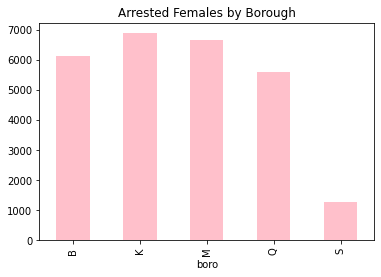

In [ ]:
#plotted stats above
dfa.groupby(['boro'])['gender'].count().plot(kind="bar", color='pink')
plt.title("Arrested Females by Borough")

In [ ]:
#filtering to only analyze Males
dfb=df[(df['gender']=='M')]

In [ ]:
# stats for breakdow of arrested males by borough
#data shows Kings again has the highest with Manhattan not far behind
dfb.groupby(['boro'])['gender'].count()

boro
B    27871
K    34631
M    32974
Q    27416
S     5925
Name: gender, dtype: int64

Text(0.5, 1.0, 'Arrested Males by Borough')

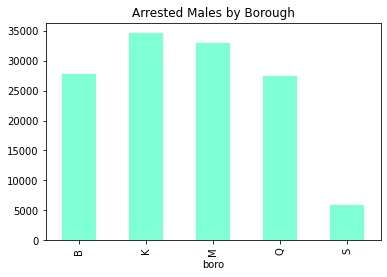

In [ ]:
dfb.groupby(['boro'])['gender'].count().plot(kind="bar", color="aquamarine")
plt.title("Arrested Males by Borough")

In [ ]:
#combining stats between Males and Females arrests by borough
dfa.groupby(['boro'])['gender'].count(),dfb.groupby(['boro'])['gender'].count()

(boro
 B    6130
 K    6893
 M    6673
 Q    5607
 S    1284
 Name: gender, dtype: int64, boro
 B    27871
 K    34631
 M    32974
 Q    27416
 S     5925
 Name: gender, dtype: int64)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  del sys.path[0]


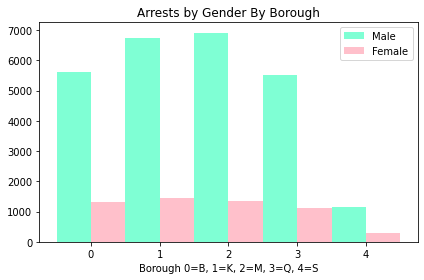

In [ ]:
#plotting the combined stats
labels = ['B', 'K', 'M', 'Q', 'S']
male_means = [5608, 6730, 6913, 5508, 1165]
female_means = [1304, 1449, 1359, 1104, 304]
x = np.arange(len(labels))  
width = 0.50  
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, male_means, width, label='Male', color='aquamarine')
rects2 = ax.bar(x + width/2, female_means, width, label='Female', color='pink')
ax.set_xlabel('Borough 0=B, 1=K, 2=M, 3=Q, 4=S')
ax.set_title('Arrests by Gender By Borough')
ax.set_xticks(x, labels)
ax.legend()
fig.tight_layout()
plt.show()

In [ ]:
# filtering to only analyze desc = dangerous drugs and race = asian/pacific islander
df2=df[(df['desc']=='DANGEROUS DRUGS') & (df['race']=='ASIAN / PACIFIC ISLANDER')]

In [ ]:
# checking if filtered correctly
df2.head(5)

,key,ARREST_DATE,PD_DESC,desc,boro,precinct,agegrp,gender,race
330,237018766,11/28/2021,"CONTROLLED SUBSTANCE, POSSESSI",DANGEROUS DRUGS,K,72,25-44,M,ASIAN / PACIFIC ISLANDER
1128,237985119,12/17/2021,"CONTROLLED SUBSTANCE, POSSESSI",DANGEROUS DRUGS,K,72,25-44,M,ASIAN / PACIFIC ISLANDER
1752,237537062,12/8/2021,"CONTROLLED SUBSTANCE, POSSESSI",DANGEROUS DRUGS,M,28,25-44,M,ASIAN / PACIFIC ISLANDER
2822,238492241,12/31/2021,"CONTROLLED SUBSTANCE, INTENT T",DANGEROUS DRUGS,Q,109,45-64,M,ASIAN / PACIFIC ISLANDER
2859,237060467,11/29/2021,"CONTROLLED SUBSTANCE,INTENT TO",DANGEROUS DRUGS,M,14,25-44,M,ASIAN / PACIFIC ISLANDER


In [ ]:
#checking the numbers
df2['race'].count()

389

In [ ]:
#checking the numbers again by using a different variable
df2['agegrp'].count()

389

In [ ]:
# pulling the breakdown by age group of asian/pacific islander arrested due to dangerous drugs 
df2.groupby(['agegrp'])['race'].count()

agegrp
18-24     80
25-44    258
45-64     43
65+        4
<18        4
Name: race, dtype: int64

Text(0.5, 1.0, 'Arrested by Age Group')

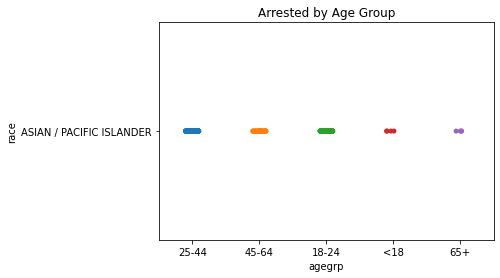

In [ ]:
#plotting the stats above using seaborn
sns.stripplot(x= 'agegrp', y= 'race', data=df2)
plt.title("Arrested by Age Group")

In [120]:
#precinct 68 has the most Asian/Pacific Islander arrest out of all of the precincts
df2.groupby(['precinct'])['race'].count()

precinct
5       5
6       1
7       3
9       3
10      1
14     18
20      1
24      2
25     20
28      4
30      1
32      1
33      1
40      1
42      2
44      2
45      8
46      1
47      1
48      1
50      1
60      5
61      5
62     13
63      2
66      3
67      3
68     55
69      2
70      3
71      1
72     33
73      1
75      4
76      2
78      1
79      5
83      2
84      1
88      1
90      2
102     8
103    17
105     5
106    16
107     5
108     5
109    46
110    15
111     3
112     2
113     7
114    20
115     7
120     7
121     1
122     3
Name: race, dtype: int64

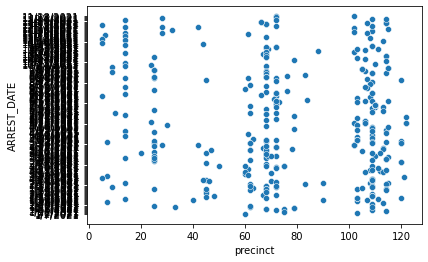

In [ ]:
sns.scatterplot(x='precinct', y='ARREST_DATE', data=df2)

In [108]:
#tried to resize each chart in my pie chart, but the figure size has been stored and i am unable to plot anything without getting an error message
df2.groupby(['agegrp'])['race'].count().plot(kind="pie")
fig = plt.figure(figsize=(5,3))
ax = fig.add_axes((0,0,.5,1))
ax.set_title('Arrested by Age Group', bbox={'facecolor':'0.8', 'pad':3})

TypeError: ignored

In [110]:
#tried this but also does not work
df2.groupby(['agegrp'])['race'].count().plot(kind="pie")
fig = plt.gcf()
fig.set_size_inches(5,5) 

TypeError: ignored

In [ ]:
#found this online to clear figure info, but did not work
from matplotlib import pyplot as plt
fig = plt.figure()
plt.figure().clear()
plt.close()
plt.cla()
plt.clf()

In [111]:
from matplotlib import pyplot as plt
plt.clf(5,5)

TypeError: ignored